# Weather Analysis
## Overview
### This Python script will visualize the weather of 500 unique cities across the world in random locations using Citypy. Citipy is a simple city-finding python package that was used to find randomly located cities. The OpenWeatherMap API was used to return current weather statistics for those cities.
### A series of scatter plots will be used to showcase the following relationships:
* Temperature (F) vs. Latitude.
* Humidity (%) vs. Latitude.
* Cloudiness (%) vs. Latitude.
* Wind Speed (mph) vs. Latitude.
### The script will:
* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

# WeatherPy
---
'''
Observable Trends:
1.
2.
3.
'''

In [1]:
# Dependencies
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns

# Import Open Weather Map API keys.
from owm_api_key import api_key

## Data Retrieval

In [3]:
# Declare variables describing the scope of lat/lng search for cities. 
# Lat ranges from -90 to 90. Lng ranges from -180 to 180.
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}

# Create arrays containing increments of lat and long.
lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)

In [4]:
# Create an empty data frame to city and weather data
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [5]:
'''Query Citipy with random lat-long values until we collect our sample, and append weather
data via Open Weather Map API call.''' 

# Set the sample size.
sample_size = 50

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Choose a random point within our lat-lng domain.
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        # Append data to df columns
        cities_df.set_value(record, "city_name", city_name)
        cities_df.set_value(record, "country_code", country_code)
        cities_df.set_value(record, "rand_lat", rand_lat)
        cities_df.set_value(record, "rand_lng", rand_lng)
        cities_df.set_value(record, "Latitude", latitude)
        cities_df.set_value(record, "Longitude", longitude)
        cities_df.set_value(record, "Temp (F)", temp)
        cities_df.set_value(record, "Humidity (%)", humidity)
        cities_df.set_value(record, "Cloudiness (%)", cloud)
        cities_df.set_value(record, "Wind Speed (mph)", wind)

        record += 1
        
        # Wait between 1-15 seconds before next loop
        time.sleep(random.randint(1, 15))
        
    else:
        pass
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

# Visualize df
cities_df.head()

Status code: 200 DF Length is now: 1
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200 DF Length is now: 2
City: Paihia. http://api.openweathermap.org/data/2.5/weather?q=russell,nz&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200 DF Length is now: 3
City: Najran. http://api.openweathermap.org/data/2.5/weather?q=najran,sa&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200 DF Length is now: 4
City: Westport. http://api.openweathermap.org/data/2.5/weather?q=westport,nz&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200 DF Length is now: 5
City: Hilo. http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200 DF Length is now: 6
City: Pirapo. http://api.openweathermap.org/data/2.5/weather?q=pirapo,py&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status co

Status code: 200 DF Length is now: 50
City: Elk. http://api.openweathermap.org/data/2.5/weather?q=elk,pl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
------------------------------
Data Retrieval Complete
------------------------------



,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,jamestown,sh,-26.8,-2.94,-15.94,-5.72,66.56,100,88,13.69
1,russell,nz,-29.31,179.64,-35.28,174.09,52.25,81,48,19.51
2,najran,sa,17.86,44.21,17.49,44.13,84.2,25,0,4.7
3,westport,nz,-39.18,167.87,-41.75,171.6,40.01,100,92,2.28
4,hilo,us,15.05,-155.15,19.73,-155.09,63.68,94,90,8.05


In [6]:
# The total sample size.
len(cities_df)

50

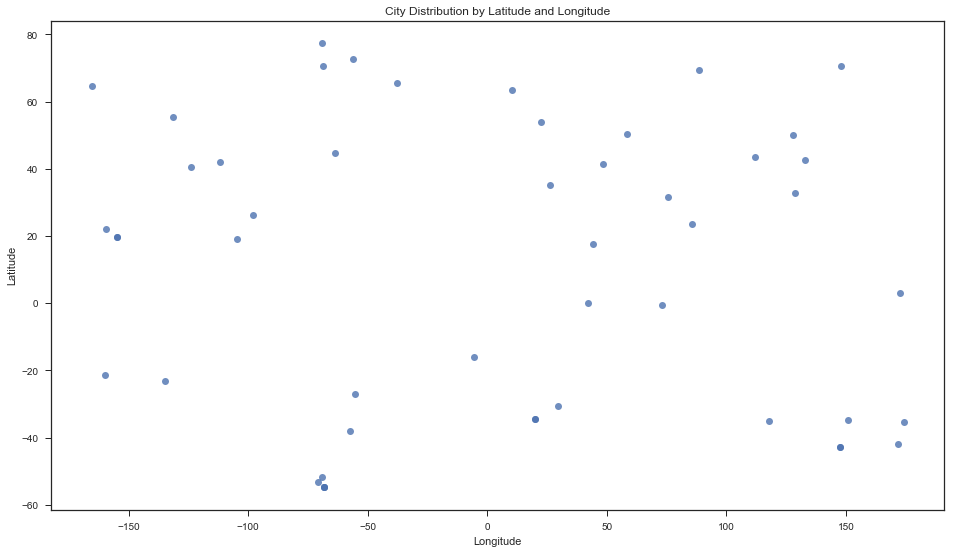

In [7]:
# This is a simple plot of latitude and longitude: it confirms that the sample is sufficiently random across
# the "map" of the world that it shows.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
p = sns.regplot(x="Longitude", y="Latitude", data=cities_df, fit_reg=False).set_title('City Distribution by Latitude and Longitude')
plt.show()

## Save csv

In [ ]:
# Save the DataFrame as a csv
cities_df.to_csv("Output/weatherpy_data.csv", encoding="utf-8", index=False)

## Plot Graphs

###  Latitude vs. Temperature Plot

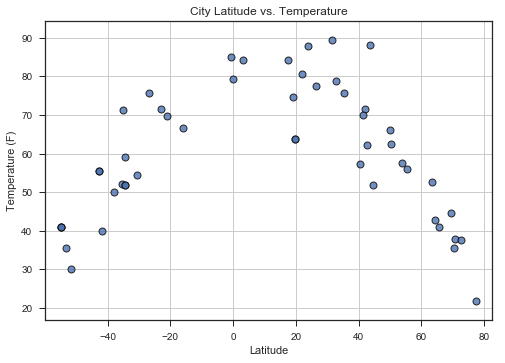

In [9]:
# Build a scatter plot City Latitude vs. Temperature
plt.scatter(cities_df["Latitude"], 
            cities_df["Temp (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(cities_df["Latitude"]-5), max(cities_df["Latitude"]+5)])
plt.ylim([min(cities_df["Temp (F)"]-5), max(cities_df["Temp (F)"]+5)])

# Save the figure
plt.savefig("Output/lat_v_temp.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

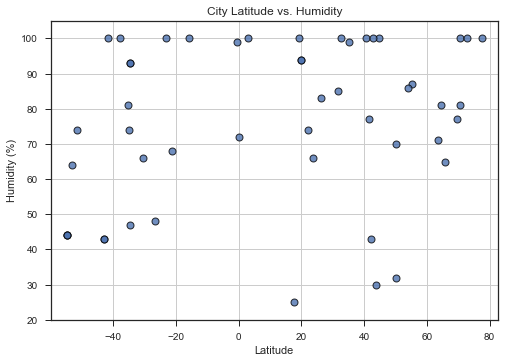

In [10]:
# Build a scatter plot City Latitude vs. Humidity
plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(cities_df["Latitude"]-5), max(cities_df["Latitude"]+5)])
plt.ylim([min(cities_df["Humidity (%)"]-5), max(cities_df["Humidity (%)"]+5)])

# Save the figure
plt.savefig("Output/lat_v_humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

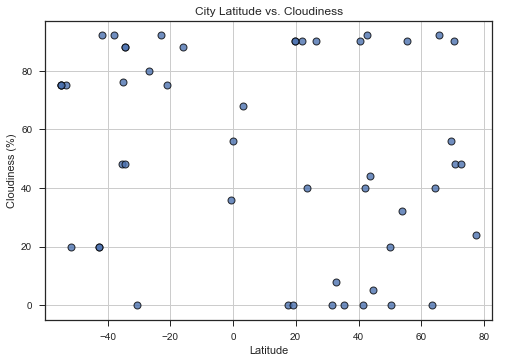

In [11]:
# Build a scatter plot City Latitude vs. Cloudiness
plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(cities_df["Latitude"]-5), max(cities_df["Latitude"]+5)])
plt.ylim([min(cities_df["Cloudiness (%)"]-5), max(cities_df["Cloudiness (%)"]+5)])

# Save the figure
plt.savefig("Output/lat_v_cloud.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

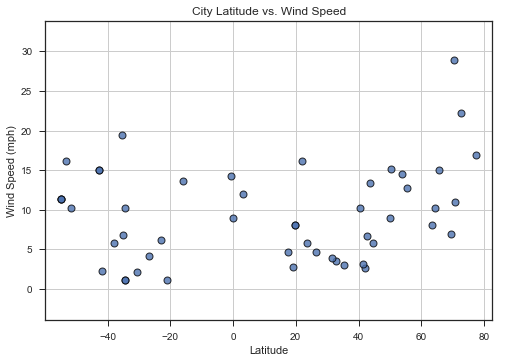

In [12]:
# Build a scatter plot City Latitude vs. Wind Speed
plt.scatter(cities_df["Latitude"], 
            cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(cities_df["Latitude"]-5), max(cities_df["Latitude"]+5)])
plt.ylim([min(cities_df["Wind Speed (mph)"]-5), max(cities_df["Wind Speed (mph)"]+5)])

# Save the figure
plt.savefig("Output/lat_v_wind.png")

# Show plot
plt.show()